In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Disable warnings!
import warnings
warnings.filterwarnings("ignore") 

In [3]:
# Data Source:
# https://www.transtats.bts.gov/databases.asp?Mode_ID=1&Mode_Desc=Aviation&Subject_ID2=0 

### Top 5 busiest Aiport

Regarding to number of departures, top 5 busiest airports and Boston airport are selected for analyzing. Data contains the flights from these selected airports to the all airports in USA.

In [4]:
# ['ATL','LAX','ORD','DFW','JFK','BOS'] #top 5 busiest airports and Boston airport
top5=pd.read_csv('/Users/ee/Documents/GITHUB/Project_5 Predict Delay Time of Flights/data/flight data/top5.csv') # contains betwen 2016-March to 2019-February
top5.shape

(4030987, 111)

In [5]:
list(set(top5['IATA_CODE_Reporting_Airline'])) # the airlines that data consist of

['9E',
 'AA',
 'UA',
 'YX',
 'OH',
 'YV',
 'AS',
 'NK',
 'G4',
 'DL',
 'B6',
 'EV',
 'VX',
 'F9',
 'WN',
 'MQ',
 'HA',
 'OO']

In [6]:
list(set(top5['OriginCityName'])) # the cities where origin airports at

['Los Angeles, CA',
 'New York, NY',
 'Chicago, IL',
 'Atlanta, GA',
 'Dallas/Fort Worth, TX',
 'Boston, MA']

In [7]:
# list(top5.columns)

# COLUMNS AND AIRPORT

In [8]:
cols=['Year','FlightDate','Quarter','Month','DayofMonth','DayOfWeek','Flight_Number_Reporting_Airline',
      'IATA_CODE_Reporting_Airline', 'Tail_Number','Origin',
     'Dest','ActualElapsedTime','AirTime','CRSArrTime','CRSDepTime','DepTime','DepDelay','DepDelayMinutes','DepDel15','DepartureDelayGroups',
     'ArrTime', 'ArrDelay','ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','DepTimeBlk','ArrTimeBlk','TaxiIn','TaxiOut','WheelsOff',
     'OriginCityName','OriginStateName','DestCityName','DestStateName']

# 'Flight_Number_Marketing_Airline', 'CRSArrTime','CRSDepTime',

In [9]:
df=top5[cols]
df.shape

(4030987, 34)

In [10]:
df.isnull().sum().sum() # the sum of the all null values of the all dataframe cells

3566177

In [11]:
df.dropna(inplace=True) # dropped all null cells from the dataframe
df.shape

(3508584, 34)

In [12]:
df.isnull().sum().sum()

0

In [13]:
round((1-df.shape[0]/top5.shape[0]),2) # the ratio of dropped data

0.13

In [14]:
df.head(10).T

,462696,462697,462698,462699,462700,462701,462702,462703,462704,462705
Year,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
FlightDate,2018-10-14,2018-10-15,2018-10-16,2018-10-17,2018-10-18,2018-10-19,2018-10-21,2018-10-22,2018-10-23,2018-10-24
Quarter,4,4,4,4,4,4,4,4,4,4
Month,10,10,10,10,10,10,10,10,10,10
DayofMonth,14,15,16,17,18,19,21,22,23,24
DayOfWeek,7,1,2,3,4,5,7,1,2,3
Flight_Number_Reporting_Airline,1674,1674,1674,1674,1674,1674,1674,1674,1674,1674
IATA_CODE_Reporting_Airline,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA
Tail_Number,N925UY,N583UW,N581UW,N551UW,N181UW,N563UW,N507AY,N554UW,N549UW,N913US
Origin,LAX,LAX,LAX,LAX,LAX,LAX,LAX,LAX,LAX,LAX


In [15]:
# delay_groups=pd.read_csv('/Users/ee/Documents/GITHUB/Project_5 Predict Delay Time of Flights/data/L_ONTIME_DELAY_GROUPS.csv_')
# delay_groups

## TIME CLASSIFICATION

In [16]:
# # alternative Departure Time classification
# ['0':0,59],['1':100,159],['2':200,259],['3':300,359],['4':400,459],
# ['5':500,559],['6':600,659],['7':700,759],['8':800,859],['9':900,959],
# ['10':1000,1059],['11':1100,1159],['12':1200,1259],['13':1300,1359],
# ['14':1400,1459],['15':1500,1559],['16':1600,1659],['17':1700,1759],
# ['18':1800,1859],['19':1900,1959],['20':2000,2059],
# ['21':2100,2159],['22':2200,2259],['23':2300,2359]

In [17]:
time_class_dict={ 'Q1':[0, 600], 'Q2':[601, 1200],
                    'Q3':[1201,1800], 'Q4':[1801,2400]
                  }

def time_class_maker(value, time_class_dict=time_class_dict):
        for k, v in time_class_dict.items():
            if (value>=v[0] and value<=v[1]):
                return(k)
            elif value=='NaN':
                return('unknown')# if time is null so it will return to string as 'unknown'

In [18]:
def clock(i):
    if i<10:
        new_time='00:0'+str(i).replace('.0','')
    elif i<60:
        new_time='00:'+str(i).replace('.0','')
    elif i<110:
        new_time='0'+str(int(i/100))+':'+'0'+str(int(i%100))
    elif (159<i<210 or 259<i<310 or 359<i<410 or 459<i<510 or 559<i<610 or 659<i<710
         or 759<i<810 or 859<i<910 ):
        new_time='0'+str(int(i/100))+':'+'0'+str(int(i%100))
    elif i< 1000:
        new_time='0'+str(int(i/100))+':'+str(int(i%100)) #.replace('.0','')
    elif (959<i<1010 or 1059<i<1110 or 1159<i<1210
         or 1259<i<1310 or 1359<i<1410 or 1459<i<1510 or 1559<i<1610 or 1659<i<1710
         or 1759<i<1810 or 1859<i<1910 or 1959<i<2010 or 2059<i<2110 or 2159<i<2210
         or 2259<i<2310 ):
        new_time=str(int(i/100))+':'+'0'+str(int(i%100))
    elif i==2400:
        new_time=str(int(i/100))+':00'
    else:
        new_time=str(int(i/100))+':'+str(i%100).replace('.0','')
    return(new_time)

### add Time classes & convert time

In [19]:
df['DepTime_Class']=df['DepTime'].map(lambda x: time_class_maker(x))
df['ArrTime_Class']=df['ArrTime'].map(lambda x: time_class_maker(x))
df['ArrTime2']=df['ArrTime'].map(lambda x: clock(x))
df['DepTime2']=df['DepTime'].map(lambda x: clock(x))
df.shape

(3508584, 38)

### add the binary column

In [20]:
def do_binary(number):
    if number<=0:
        result=0
    else:
        result=1
    return(result)

In [21]:
df['binary']=df['DepartureDelayGroups'].map(lambda x: do_binary(x))
df.shape

(3508584, 39)

In [22]:
airport_list=sorted(list(set(df['Origin'])))
# airport_list

 # EXPLORE DATA

## Airline Block Time Analysis

In [23]:
import statistics
from scipy import stats

In [24]:
def top_destinations(df,airline,origin,num_of_top_dest,year):
    
    df_res = df[df['Origin']==origin][df['IATA_CODE_Reporting_Airline']==airline][df['Year']==year]
    # to find the count of the rows, any column could be chosen because all of them are accounte equally. Here 'Year' is selected.
    df_res = df_res.groupby(['Dest']).count().sort_values('Year',ascending=False).head(num_of_top_dest)  
    df_res = df_res[['Year']].rename(columns={'Year':'# of arrivals'})
    return df_res

In [25]:
def graphs(table,main_title):

    plt.subplots(2,2, figsize=(20,15))
    plt.suptitle(main_title, size=20) # add above a Main Title

    plt.subplot(2,2,1, title='distribution of Block Time')
    sns.distplot(table['ActualElapsedTime'], bins=25, kde=True, color='c') # alternative colors are k, g, b, and m

    plt.subplot(2,2,2, title='distribution of Air Time')
    sns.distplot(table['AirTime'], bins=25, kde=True)

    plt.subplot(2,2,3, title='distribution of Taxi Out')
    sns.distplot(table['TaxiOut'], bins=25, kde=True)

    plt.subplot(2,2,4, title='distribution of Taxi In')
    sns.distplot(table['TaxiIn'], bins=25, kde=True)

In [26]:
# parameters: dataframe, airline, origin, # of top flight destinations, year
def distribution(df,airline,origin,num_of_top_dest,year):
    top_x=top_destinations(df,airline,origin,num_of_top_dest,year)

    for i in range(len(top_x.index)):
        
        table=df[df['IATA_CODE_Reporting_Airline']==airline]
        table=table[table["Origin"]==origin][table['Dest']==top_x.index[i]][table['Year']==year]
        
        m_title='--- Graphs from '+ origin + ' to ' + top_x.index[i] +' ---'
        graphs(table,m_title)
        

In [27]:
# confidence intervals
def confidence(df,column,alpha):    
    p = ((1.0-alpha)/2.0) * 100
    lower = np.percentile(df[column], p)
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = np.percentile(df[column], p)
    return (lower,upper)

In [28]:
def percentile_right(df,column,alpha):
    upper=np.percentile(df[column], alpha*100)
    return upper

In [29]:
def parameters(df,alpha):
    
    mean_1=statistics.mean(df['ActualElapsedTime'])
    std_1=statistics.stdev(df['ActualElapsedTime'])
    percentile_1=percentile_right(df,'ActualElapsedTime', alpha)
    upper_1=confidence(df,'ActualElapsedTime',alpha)[1]
    lower_1=confidence(df,'ActualElapsedTime',alpha)[0]
    mean_2=statistics.mean(df['AirTime'])
    std_2=statistics.stdev(df['AirTime'])
    percentile_2=percentile_right(df,'AirTime', alpha)
    upper_2=confidence(df,'AirTime',alpha)[1]
    lower_2=confidence(df,'AirTime',alpha)[0]
    
    mean_3=statistics.mean(df['TaxiOut'])
    std_3=statistics.stdev(df['TaxiOut'])
    percentile_3=percentile_right(df,'TaxiOut', alpha)
    upper_3=confidence(df,'TaxiOut',alpha)[1]
    lower_3=confidence(df,'TaxiOut',alpha)[0]
    
    mean_4=statistics.mean(df['TaxiIn'])
    std_4=statistics.stdev(df['TaxiIn'])
    percentile_4=percentile_right(df,'TaxiIn', alpha)
    upper_4=confidence(df,'TaxiIn',alpha)[1]
    lower_4=confidence(df,'TaxiIn',alpha)[0]
    
    mean_BT=mean_1
    mean_composition=mean_2+mean_3+mean_4
    var_BT=std_1**2
    var_composition=std_2**2+std_3**2+std_4**2
    percentile_BT=percentile_1
    percentile_composition=percentile_2+percentile_3+percentile_4
    upper_BT=upper_1
    lower_BT=lower_1
    upper_composition=upper_2+upper_3+upper_4
    lower_composition=lower_2+lower_3+lower_4
    
    print (f'Block Time Mean:       {mean_BT:.0f}\nComposition Time Mean: {mean_composition:.0f}\n')
    print(f'Block Time Variance:       {var_BT:.0f}\nComposition Time Variance: {var_composition:.0f}\n')    
    print (f'Block Time {alpha*100:.0f} Percentile:       {percentile_BT:.0f}\nComposition Time {alpha*100:.0f} Percentile: {percentile_composition:.0f}\n')
    print('Block Time %.0f confidence interval:       %.0f and %.0f' % (alpha*100, lower_BT, upper_BT))
    print('Composition Time %.0f confidence interval: %.0f and %.0f' % (alpha*100, lower_composition, upper_composition))

In [30]:
# parameters: dataframe, airline, origin, # of top flight destinations, year, confidence level
def stats(df,airline,origin,num_of_top_dest,year,alpha):
    
    top_x=top_destinations(df,airline,origin,num_of_top_dest,year)

    for i in range(len(top_x.index)):
        
        table=df[df['IATA_CODE_Reporting_Airline']==airline]
        table=table[table["Origin"]==origin][table['Dest']==top_x.index[i]][table['Year']==year]
        print(f'\n\n------- Values from  {origin}  to  { top_x.index[i]} -------')
        parameters(table,alpha)


In [31]:
# parameters: dataframe, airline, origin, # of top flight destinations, year
def describe_stats(df,airline,origin,num_of_top_dest,year):
    
    top_x=top_destinations(df,airline,origin,num_of_top_dest,year)

    for i in range(len(top_x.index)):
        
        table=df[df['IATA_CODE_Reporting_Airline']==airline]
        table=table[table["Origin"]==origin][table['Dest']==top_x.index[i]][table['Year']==year]
        
        BT_describe=table['ActualElapsedTime'].describe()
        AT_describe=table['AirTime'].describe()
        TO_describe=table['TaxiOut'].describe()
        TI_describe=table['TaxiIn'].describe()
        
        print(f'\n\n--- Statistics from  {origin}  to  { top_x.index[i]} ---\n\n{BT_describe}\n{AT_describe}\n{TO_describe}\n{TI_describe}')

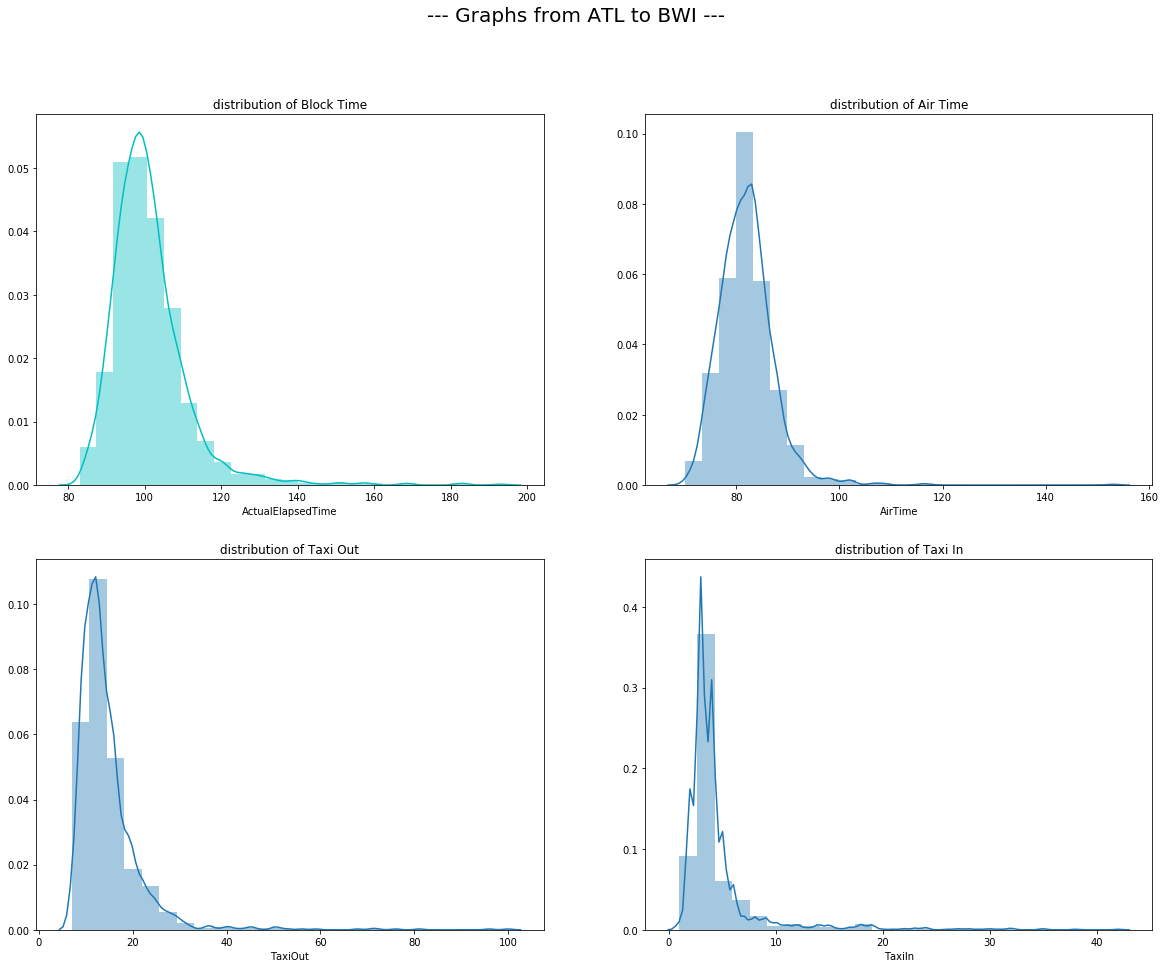

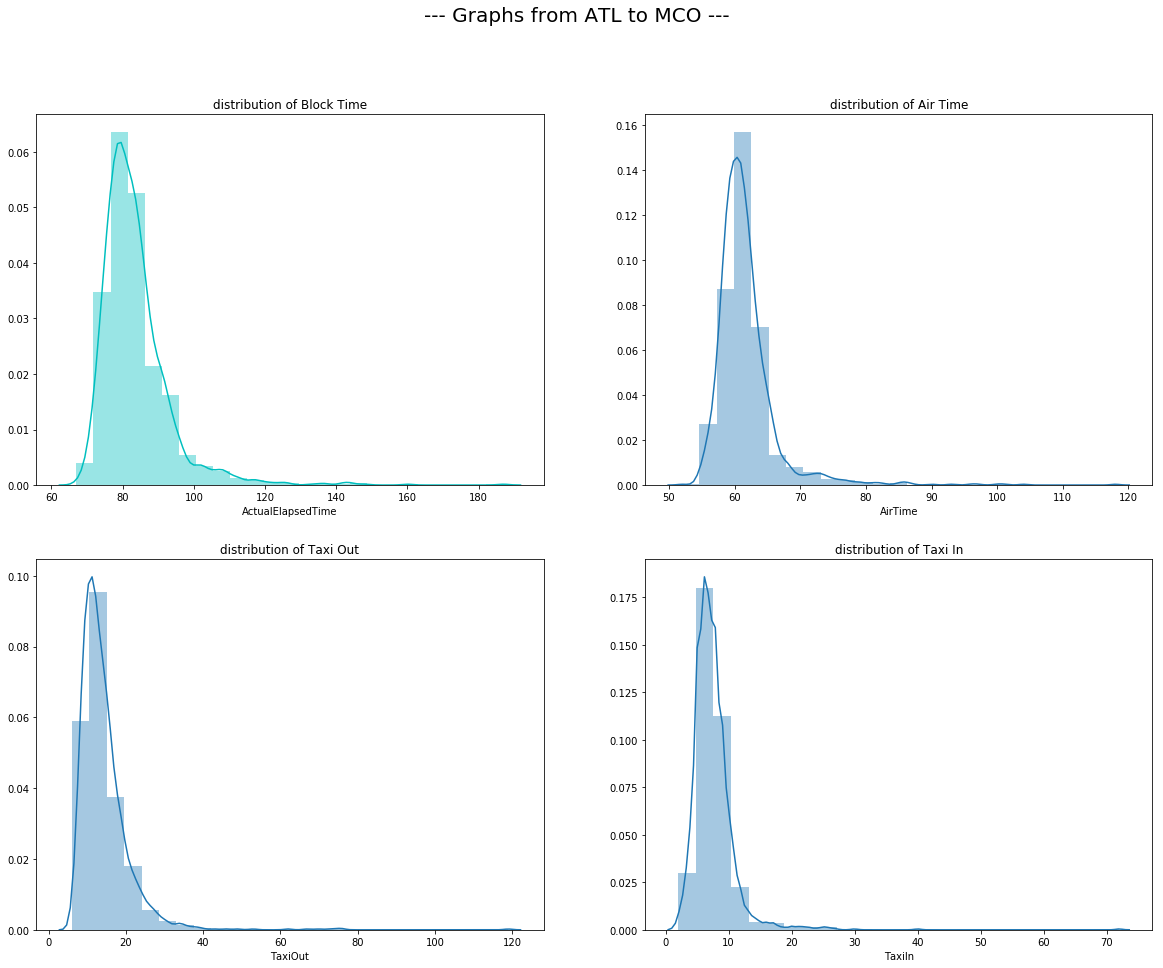

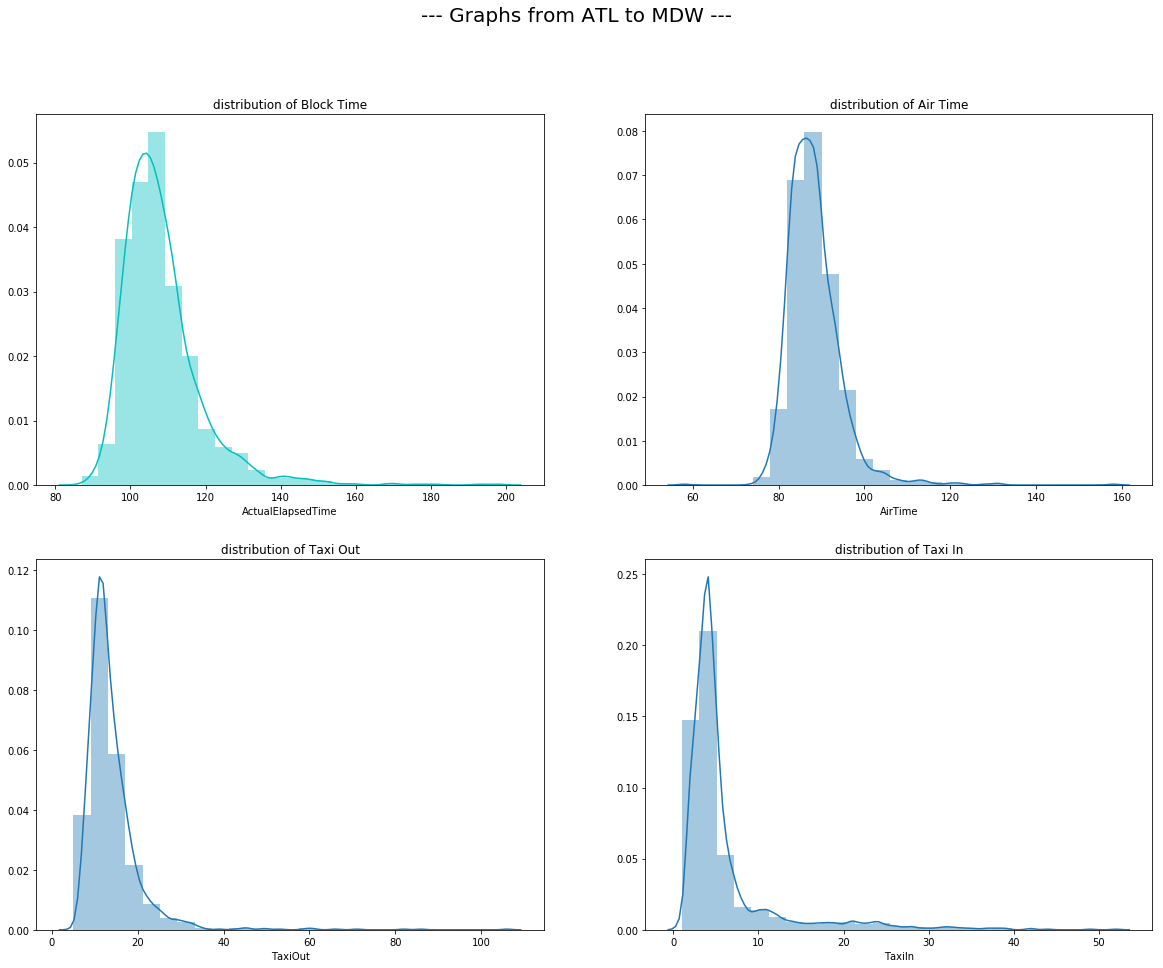

In [32]:
distribution(df,'WN','ATL',3,2018)

Block Time is sum of the Air Time, Taxi In and Taxi Out.
if sum of the mean/variance of the Air Time, Taxi Out and Taxi In is eqaul to mean/variance of the Block Time, it means that components of Block Time are independent from eachother. Here, variance of Block Time and Varinace of the sum of the components are not equal but slighlty close to eachother. So, we can say there is a slight relationship between the components.

In [33]:
stats(df,'WN','ATL',3,2018,0.8) 



------- Values from  ATL  to  BWI -------
Block Time Mean:       101
Composition Time Mean: 101

Block Time Variance:       102
Composition Time Variance: 98

Block Time 80 Percentile:       107
Composition Time 80 Percentile: 107

Block Time 80 confidence interval:       91 and 111
Composition Time 80 confidence interval: 87 and 116


------- Values from  ATL  to  MCO -------
Block Time Mean:       83
Composition Time Mean: 83

Block Time Variance:       93
Composition Time Variance: 81

Block Time 80 Percentile:       88
Composition Time 80 Percentile: 90

Block Time 80 confidence interval:       75 and 93
Composition Time 80 confidence interval: 72 and 96


------- Values from  ATL  to  MDW -------
Block Time Mean:       108
Composition Time Mean: 108

Block Time Variance:       112
Composition Time Variance: 121

Block Time 80 Percentile:       114
Composition Time 80 Percentile: 116

Block Time 80 confidence interval:       98 and 120
Composition Time 80 confidence interval: 93 

In [34]:
describe_stats(df,'WN','ATL',3,2018)



--- Statistics from  ATL  to  BWI ---

count    1724.000000
mean      101.108469
std        10.122142
min        83.000000
25%        95.000000
50%        99.000000
75%       105.000000
max       193.000000
Name: ActualElapsedTime, dtype: float64
count    1724.000000
mean       81.977958
std         5.402605
min        70.000000
25%        79.000000
50%        82.000000
75%        85.000000
max       153.000000
Name: AirTime, dtype: float64
count    1724.000000
mean       14.576566
std         7.226093
min         7.000000
25%        11.000000
50%        13.000000
75%        16.000000
max       100.000000
Name: TaxiOut, dtype: float64
count    1724.000000
mean        4.553944
std         4.038410
min         1.000000
25%         3.000000
50%         3.500000
75%         5.000000
max        42.000000
Name: TaxiIn, dtype: float64


--- Statistics from  ATL  to  MCO ---

count    1717.000000
mean       83.487478
std         9.639631
min        67.000000
25%        78.000000
50%        8

## Monthly Block Time Analysis

In [35]:
JB=df[df['IATA_CODE_Reporting_Airline']=='WN'][df['Year']==2017]
JB.shape

(94839, 39)

In [36]:
# JB.groupby(['Origin','Dest']).count().sort_values('Year',ascending=False)

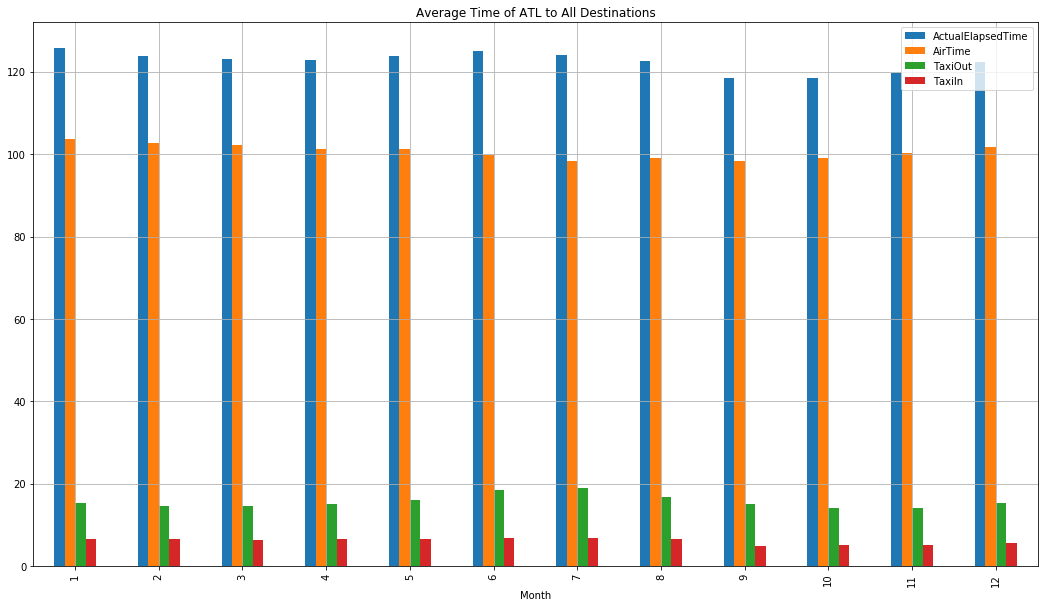

In [68]:
JB_one_origin=JB[JB['Origin']=='ATL']
title='Average Time of '+list(set(JB_one_origin['Origin'].values))[0]+' to All Destinations'
month_avg=JB_one_origin.groupby('Month').mean()[['ActualElapsedTime','AirTime','TaxiOut','TaxiIn']]
month_avg[['ActualElapsedTime', 'AirTime', 'TaxiOut', 'TaxiIn']].plot(kind='bar', title=title, figsize=(18,10),grid=True)
plt.show()

In [69]:
def bar_chart(df,origin,dest):

    title='Average Time of '+str(origin)+' to ' +str(dest)
    df[['ActualElapsedTime', 'AirTime', 'TaxiOut', 'TaxiIn']].plot(kind='bar', figsize=(18,10),title=title,grid=True)
    plt.show()

In [70]:
# parameters: dataframe, airline, origin, # of top flight destinations, year
def month_graphs(df,airline,origin,num_of_top_dest,year):
    
    top_x=top_destinations(df,airline,origin,num_of_top_dest,year)
    
    
    for i in range(len(top_x.index)):
        
        table=df[df['IATA_CODE_Reporting_Airline']==airline][df["Origin"]==origin]
        table=table[table['Dest']==top_x.index[i]][table['Year']==year]
        month_avg=table.groupby('Month').mean()[['ActualElapsedTime','AirTime','TaxiOut','TaxiIn']]
        bar_chart(month_avg,origin,top_x.index[i])

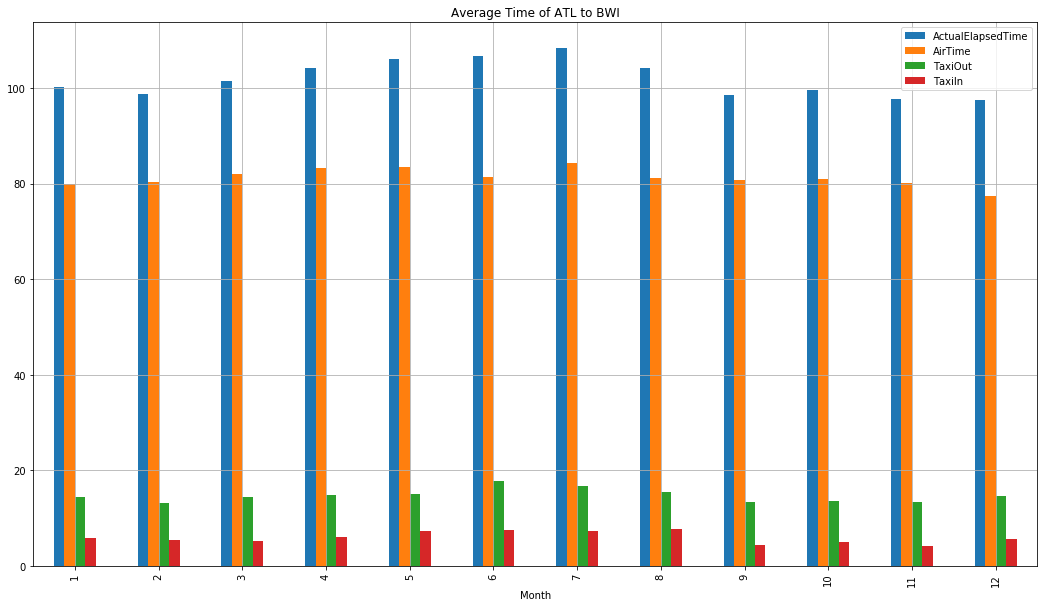

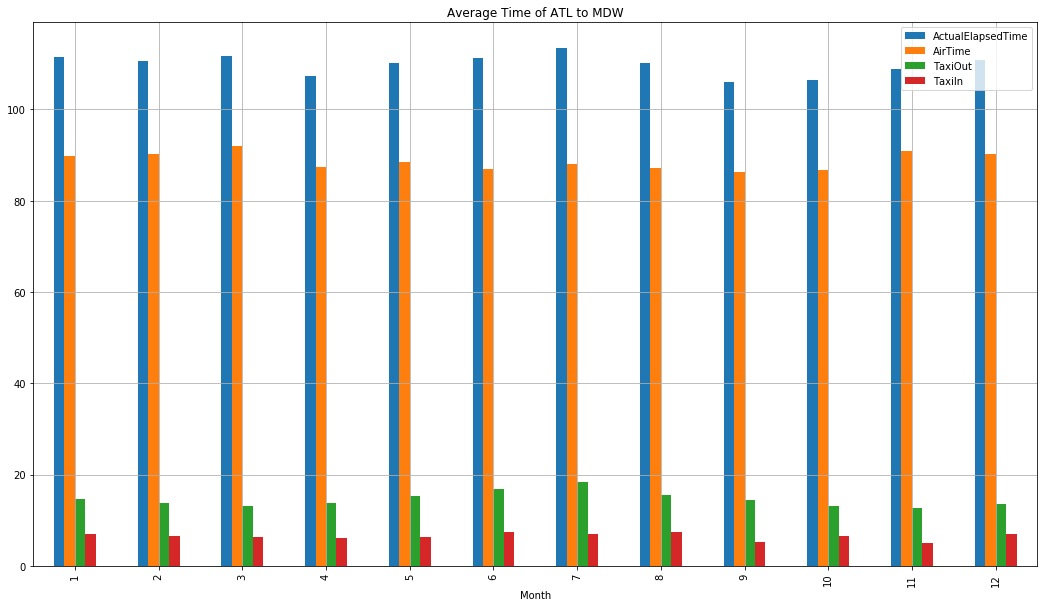

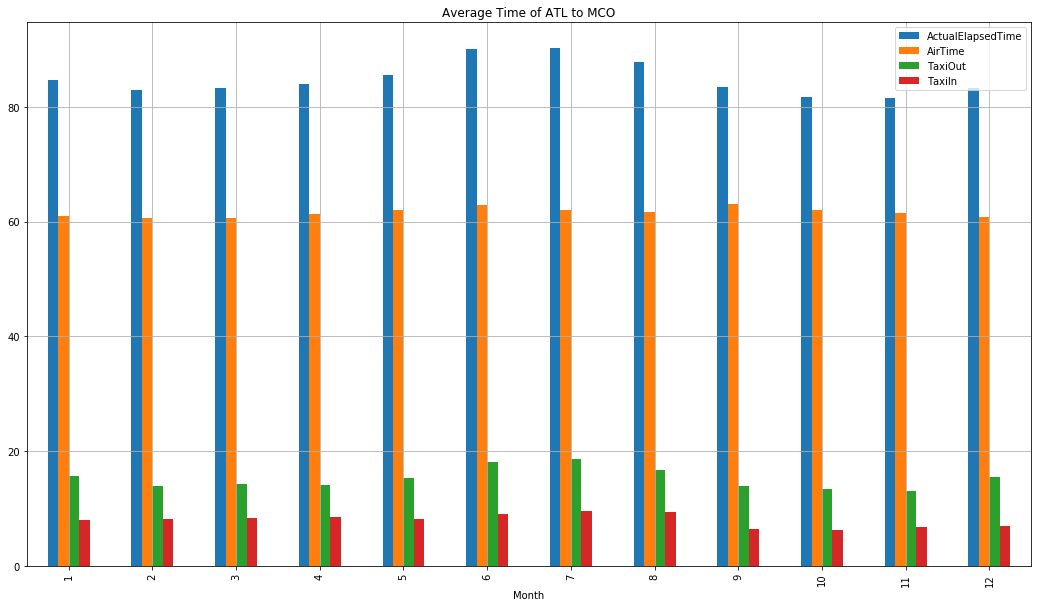

In [71]:
# run the function for JetBlue's the most flight 3 destinations from JFK airport for year-2017
month_graphs(df,'WN','ATL',3,2017) 

## Grouping Block Time Regarding to Confidence Level

In [72]:
def thresold_binary(number,threshold):
    
    if number<=threshold:
        result=0
    else:
        result=1
    return(result)

In [73]:
# parameters: dataframe, airline, origin, # of top flight destinations, year, confidence level, Block Time
# output is graph
def classify_table(df,airline,origin,num_of_top_dest,year,alpha,column):
    
    top_x=top_destinations(df,airline,origin,num_of_top_dest,year)
    
    for i in range(len(top_x.index)):
        
        table=df[df['IATA_CODE_Reporting_Airline']==airline][df["Origin"]==origin]
        table=table[table['Dest']==top_x.index[i]][table['Year']==year]
        
        threshold=percentile_right(table,column,alpha)
        table['thresold binary']=table[column].map(lambda x: thresold_binary(x,threshold))

        month_avg=table.groupby(['thresold binary','Month']).mean()[['ActualElapsedTime','AirTime','TaxiOut','TaxiIn']]
        
        bar_chart(month_avg,origin,top_x.index[i])

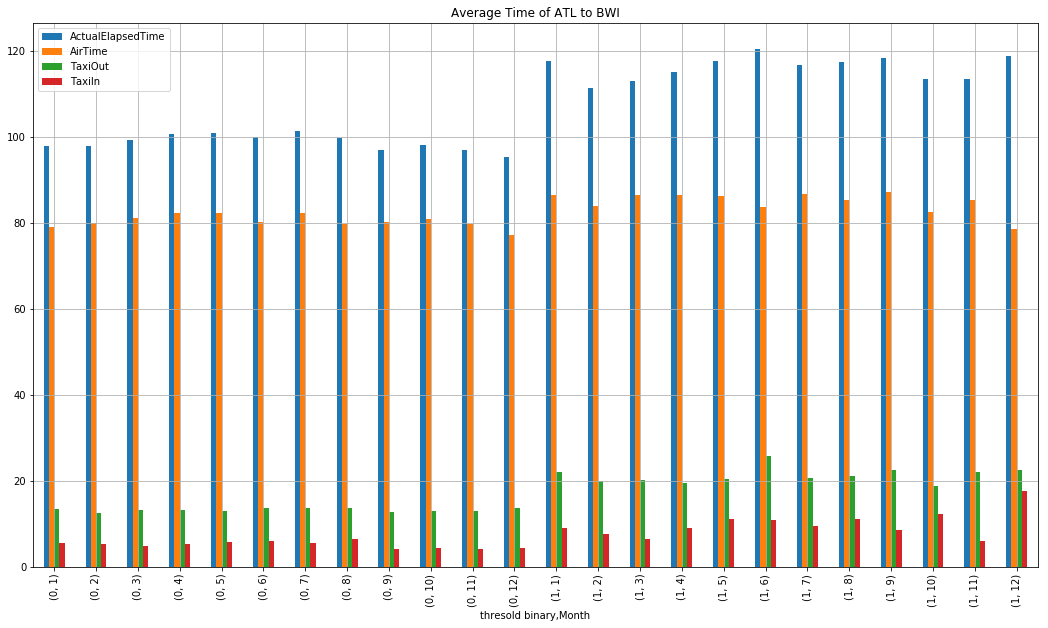

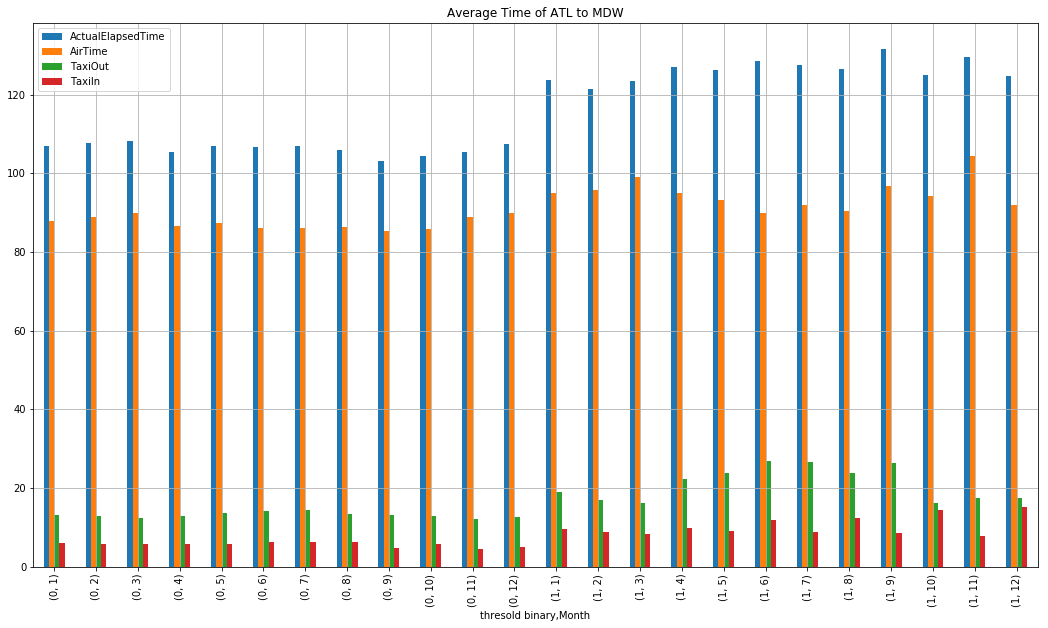

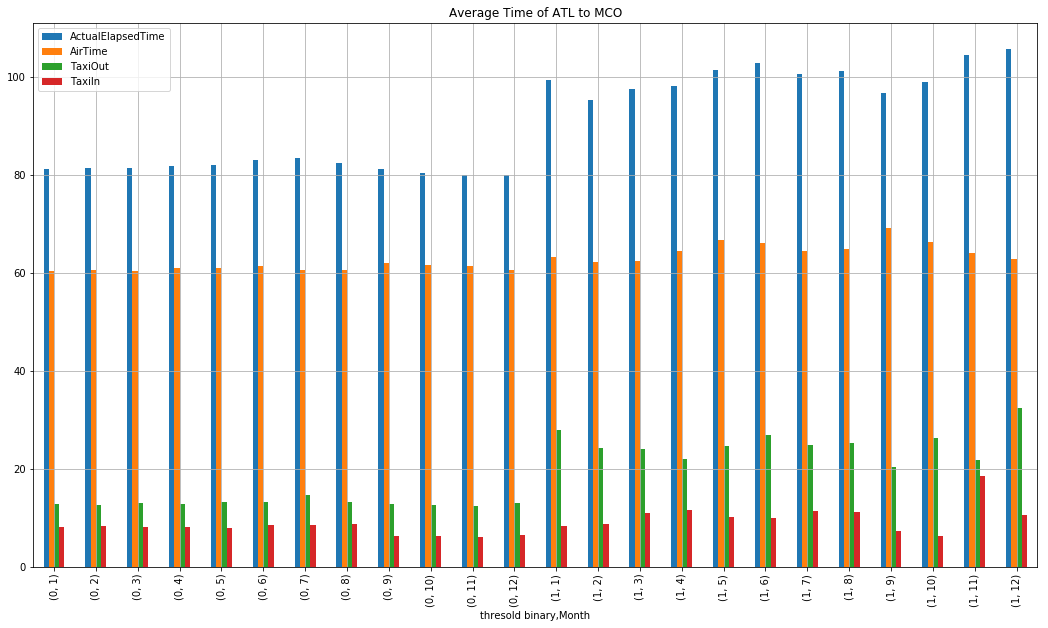

In [74]:
# run the function for JetBlue's the most flight 3 destinations from JFK airport for year-2017 with %80 confidence
classify_table(df,'WN','ATL',3,2017,0.8,'ActualElapsedTime')

## Check the Afftect of the Month on the Block Time Delays

In [89]:
def group_month(month):
    if month==11 or month==12:
        result='W1' # winter-1
    elif month==1 or month==2:
        result='W2' #winter-2
    elif month==6 or month==7 or month==8 or month==9:
        result='S' # summer
    else :
        result= 'Shoulder'
    return result

In [76]:
# parameters: dataframe, airline, origin, # of top flight destinations, year
# output is dataframe
def classify_table2(df,airline,origin,num_of_top_dest,year,alpha,column):
    
    top_x=top_destinations(df,airline,origin,num_of_top_dest,year)
    
    classified_table=pd.DataFrame(columns=df.columns)
    classified_table['thresold binary']=np.nan
    classified_table['Month_Group']=''
    
    for i in range(len(top_x.index)):
        
        table=df[df['IATA_CODE_Reporting_Airline']==airline][df["Origin"]==origin]
        table=table[table['Dest']==top_x.index[i]][table['Year']==year]
        
        threshold=percentile_right(table,column,alpha)
        table['thresold binary']=table[column].map(lambda x: thresold_binary(x,threshold))
        table['Month_Group']=table['Month'].map(lambda x: group_month(x))
        classified_table=classified_table.append(table)
    
    return classified_table

In [90]:
x_table=classify_table2(df,'WN','ATL',100,2017,0.8,'ActualElapsedTime')
x_table.shape

(41300, 41)

## Model

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

In [91]:
x_table=x_table[['Month_Group','thresold binary']]
x_table=pd.get_dummies(x_table)
x_table.head()

,thresold binary,Month_Group_S,Month_Group_Shoulder,Month_Group_W1,Month_Group_W2
2808548,0.0,0,0,0,1
2808549,0.0,0,0,0,1
2808550,0.0,0,0,0,1
2808551,0.0,0,0,0,1
2808552,0.0,0,0,0,1


In [92]:
x_table.shape

(41300, 5)

In [100]:
features=['Month_Group_S',
 'Month_Group_W1',
 'Month_Group_W2']
X=x_table[features]
y=x_table['thresold binary']

In [101]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

In [102]:
logreg_class=LogisticRegression()

In [103]:
def process_model(model,X):
    ss=StandardScaler()
    X_sc=ss.fit_transform(X)
#     print(X_sc)
    model.fit(X_sc,y_train)
    crv=cross_val_score(model,X_sc,y_train).mean()
    return(crv)

In [104]:
process_model(logreg_class,X_train).round(2)

0.81

In [105]:
ss=StandardScaler()
X_test_sc=ss.fit_transform(X_test)
logreg_class.score(X_test_sc,y_test).round(2)

0.81

In [106]:
pd.DataFrame(logreg_class.coef_.round(2),columns=X_train.columns).T

,0
Month_Group_S,0.12
Month_Group_W1,-0.04
Month_Group_W2,0.18


Shoulder class is kept as the base level by not icluded to the predictors. Therefore the coefficients of the model represent the affect levels of the related month-group (S, W1, W2) comparing by the base level month group which is Shoulder.

In [107]:
logreg_class.predict(X_test_sc).sum()

0.0

## Airline Domestic Network Map

In [55]:
import datetime, warnings, scipy 
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [57]:
year_2018=pd.read_csv('/Users/ee/Documents/GITHUB/Project_5 Predict Delay Time of Flights/data/flight data/yearly data/DATA_2018.csv')
year_2018.shape

(7197910, 111)

In [58]:
df_1=year_2018[year_2018['Month']==7]
df_1.shape

(645299, 111)

In [59]:
temp = pd.read_csv('/Users/ee/Documents/GITHUB/Project_5 Predict Delay Time of Flights/data/airports.csv')
identify_airport = temp.set_index('IATA_CODE')['CITY'].to_dict()
latitude_airport = temp.set_index('IATA_CODE')['LATITUDE'].to_dict()
longitude_airport = temp.set_index('IATA_CODE')['LONGITUDE'].to_dict()
airlines_names=pd.read_csv('/Users/ee/Documents/GITHUB/Project_5 Predict Delay Time of Flights/data/L_UNIQUE_CARRIERS.csv_')
abbr_companies = airlines_names.set_index('Code')['Description'].to_dict()

In [60]:
# this fucntion is handled from internet.
def make_map(df, carrier, long_min, long_max, lat_min, lat_max):
    fig=plt.figure(figsize=(15,8)) # 7,3
    ax=fig.add_axes([0.,0.,1.,1.])
    m = Basemap(resolution='i',llcrnrlon=long_min, urcrnrlon=long_max,
                  llcrnrlat=lat_min, urcrnrlat=lat_max, lat_0=0, lon_0=0,)
    df2 = df_1[df_1['IATA_CODE_Reporting_Airline'] == carrier]
    count_trajectories = df2.groupby(['Origin', 'Dest']).size()
    count_trajectories.sort_values(inplace = True)
    
    for (origin, dest), s in count_trajectories.iteritems():
        nylat,   nylon = latitude_airport[origin], longitude_airport[origin]
        m.plot(nylon, nylat, marker='o', markersize = 10, markeredgewidth = 1,
                   color = 'seagreen', markeredgecolor='k')

    for (origin, dest), s in count_trajectories.iteritems():
        nylat,   nylon = latitude_airport[origin], longitude_airport[origin]
        lonlat, lonlon = latitude_airport[dest], longitude_airport[dest]
        if pd.isnull(nylat) or pd.isnull(nylon) or \
                pd.isnull(lonlat) or pd.isnull(lonlon): continue
        if s < 100:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=0.5, color='b',
                             label = '< 100')
        elif s < 200:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=2, color='r',
                             label = '100 <.< 200')
        else:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=2, color='gold',
                              label = '> 200')    
    #_____________________________________________
    # remove duplicate labels and set their order
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    key_order = ('< 100', '100 <.< 200', '> 200')                
    new_label = OrderedDict()
    for key in key_order:
        if key not in by_label.keys(): continue
        new_label[key] = by_label[key]
    plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':8},
               title='flights per month', facecolor = 'palegreen', 
               shadow = True, frameon = True, framealpha = 1)    
    m.drawcoastlines()
    m.fillcontinents()
    ax.set_title('{} --2018 July Domestic Departure Flights'.format(abbr_companies[carrier]),weight='bold')

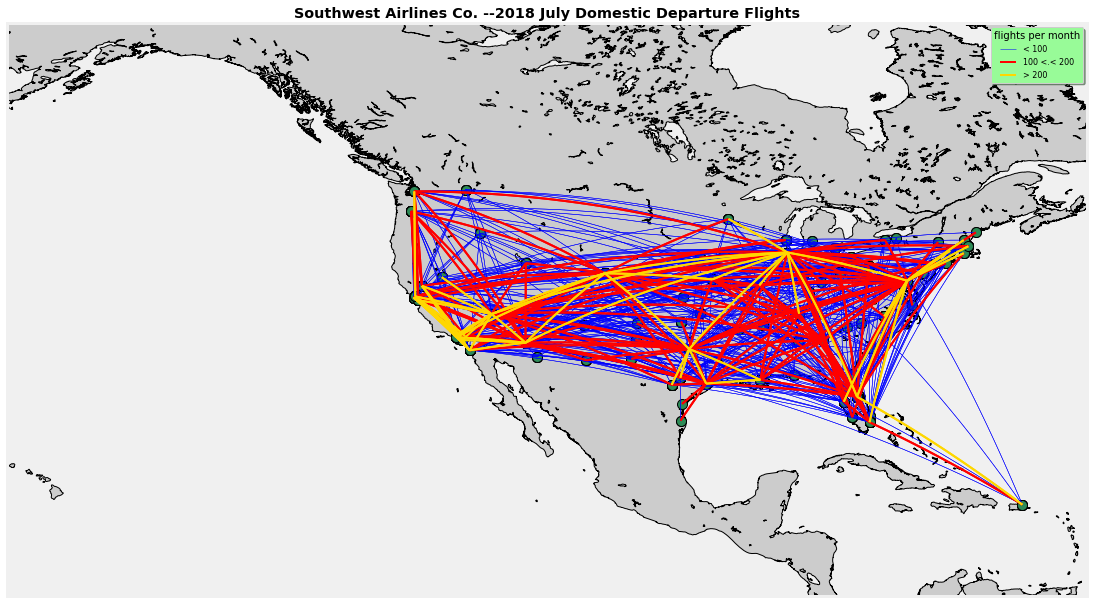

In [61]:
coord = dict()
coord['WN'] = [-160, -60, 10, 63]
# coord['B6'] = [-160, -60, 10, 63]
for carrier in ['WN']: #'WN','B6'
    make_map(df, carrier, *coord[carrier])